In [1]:
from checklib import *
from tqdm.notebook import tqdm
import json
from datetimeep import DateTimeEP
import pandas as pd

## setup

In [2]:
idd_path = r"..\demo\Energy+V9_0_1.idd"
epvars_path = r"..\demo\option2\ASHRAE901_SchoolPrimary_STD2019_ElPaso.csv"

In [3]:
with open("../schema/simplified2items.json") as json_file:
    data = json.load(json_file)
items = data["items"]

**items[0] is:**

```json
        {
            "no": 1,
            "verification_type": "compliance",
            "description_brief": "Continuous dimming (daylighting control)",
            "description_detail": "The photocontrol shall reduce electric lighting power in response to available daylight using continuous dimming to 20% or less and off.",
            "description_index": "Section 9.4.1.1 in 90.1-2019",
            "datapoints_source": {
                "output_variables": {
                    "Electric_light_power": "LIBRARY_MEDIA_CENTER_ZN_1_FLR_1_LIGHTS:Lights Electric Power [W](TimeStep)"
                }
            },
            "description_datapoints": {},
            "verification_class": "ContinuousDimmingCompliance"
        }
```

## Workflow

### Steps before reading simulation i/o are omitted

### Read simulation output

In [4]:
df = DateTimeEP(pd.read_csv(epvars_path)).transform()
point_map = items[0]["datapoints_source"]["output_variables"]
point_map_reverse = {value.strip(): key.strip() for key, value in point_map.items()}
df = df.rename(str.strip, axis="columns").rename(columns=point_map_reverse)
df.head()

,Date/Time,CORNER_CLASS_1_POD_1_ZN_1_FLR_1_LIGHTS:Lights Electric Power [W](TimeStep),CORNER_CLASS_1_POD_1_ZN_1_FLR_1_LIGHTS:Lights Electric Energy [J](TimeStep),MULT_CLASS_1_POD_1_ZN_1_FLR_1_LIGHTS:Lights Electric Power [W](TimeStep),MULT_CLASS_1_POD_1_ZN_1_FLR_1_LIGHTS:Lights Electric Energy [J](TimeStep),CORRIDOR_POD_1_ZN_1_FLR_1_LIGHTS:Lights Electric Power [W](TimeStep),CORRIDOR_POD_1_ZN_1_FLR_1_LIGHTS:Lights Electric Energy [J](TimeStep),CORNER_CLASS_2_POD_1_ZN_1_FLR_1_LIGHTS:Lights Electric Power [W](TimeStep),CORNER_CLASS_2_POD_1_ZN_1_FLR_1_LIGHTS:Lights Electric Energy [J](TimeStep),MULT_CLASS_2_POD_1_ZN_1_FLR_1_LIGHTS:Lights Electric Power [W](TimeStep),...,LOBBY_ZN_1_FLR_1_DAYLCTRL:Daylighting Reference Point 1 Illuminance [lux](TimeStep),LOBBY_ZN_1_FLR_1_DAYLCTRL:Daylighting Reference Point 2 Illuminance [lux](TimeStep),OFFICES_ZN_1_FLR_1_DAYLCTRL:Daylighting Reference Point 1 Illuminance [lux](TimeStep),OFFICES_ZN_1_FLR_1_DAYLCTRL:Daylighting Reference Point 2 Illuminance [lux](TimeStep),CAFETERIA_ZN_1_FLR_1_DAYLCTRL:Daylighting Reference Point 1 Illuminance [lux](TimeStep),CAFETERIA_ZN_1_FLR_1_DAYLCTRL:Daylighting Reference Point 2 Illuminance [lux](TimeStep),LIBRARY_MEDIA_CENTER_ZN_1_FLR_1_DAYLCTRL:Daylighting Reference Point 1 Illuminance [lux](TimeStep),LIBRARY_MEDIA_CENTER_ZN_1_FLR_1_DAYLCTRL:Daylighting Reference Point 2 Illuminance [lux](TimeStep),BLDG_LIGHT_GYM_SCH:Schedule Value [](TimeStep),BLDG_LIGHT_LIBRARY_SCH:Schedule Value [](TimeStep)
2000-12-21 00:10:00,12/21 00:10:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2000-12-21 00:20:00,12/21 00:20:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2000-12-21 00:30:00,12/21 00:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2000-12-21 00:40:00,12/21 00:40:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2000-12-21 00:50:00,12/21 00:50:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Run verification

* For easy illustration, we slice out one day out of the full year simulation results

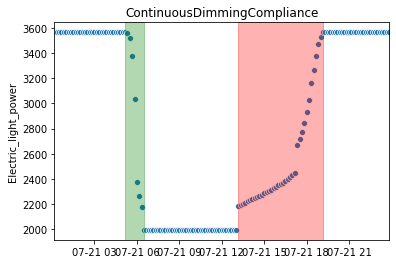

In [5]:
results = ContinuousDimmingCompliance(df["2000-07-21"]).get_checks

In [6]:
results

(True,
 {'max_up_period': 360.0,
  'max_down_period': 80.0,
  'max_up_start': Timestamp('2000-07-21 13:10:00'),
  'max_up_end': Timestamp('2000-07-21 19:10:00'),
  'max_down_start': Timestamp('2000-07-21 05:10:00'),
  'max_down_end': Timestamp('2000-07-21 06:30:00')})